<a href="https://colab.research.google.com/github/oskrplopez81/DCDP_2022/blob/main/Copy_of_estad%C3%ADstica_param%C3%A9trica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id="a"></a>
<h1><center>1 Intervalos de Confianza</center></h1>

![alt text](https://conceptosclaros.com/wp-content/uploads/2017/03/intervalo-confianza-normal-estandar-720x450.png)


* ## ¿Qué es una interavlo de confianza?

Un intervalo de confianza es una técnica de estimación utilizada en inferencia estadística que permite acotar un par o varios pares de valores, dentro de los cuales se encontrará la estimación puntual buscada (con una determinada probabilidad).

* ## El cálculo de un intervalo de confianza depende principalmente de los siguientes factores:

**Tamaño de la muestra seleccionada:** Dependiendo de la cantidad de datos que se hayan utilizado para calcular el valor muestral, este se acercará más o menos al verdadero parámetro poblacional.

**Nivel de confianza:** Nos va a informar en qué porcentaje de casos nuestra estimación acierta. Los niveles habituales son el 95% y el 99%.

**Margen de error de nuestra estimación:** Este se denomina como alfa y nos informa de la probabilidad que existe de que el valor poblacional esté fuera de nuestro intervalo.

**Lo estimado en la muestra (media, varianza, diferencia de medias…):** De esto va a depender el estadístico pivote para el cálculo del intervalo.

* ## Método de la Cantidad Pivotal

Para construir un IC para **θ** vamos a buscar una cantidad pivotal, es decir, una
función **C(X1, . . . , Xn, θ)** cuya distribución no depende de **θ**.

Una vez que la tengamos, los pasos serán:

**1.-** Obtener la distribución de la cantidad pivotal.

**2.-** Obtener C1 y C2 tales que P (C1 < C(X1, . . . , Xn, θ) < C2) = 1 − α.

**3.-** Despejar θ de las desigualdades C1 < C(X1, . . . , Xn, θ) < C2, hasta
obtener P (T1(X1, . . . , Xn) < θ < T2(X1, . . . , Xn)) = 1 − α.

**4.-** Para una muestra particular (x1, . . . , xn), el IC para θ ser´a
(T1(x1, . . . , xn), T2(x1, . . . , xn) )

  

Ejercicios

In [ ]:
import numpy as np
import random
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [ ]:
response=[]
df=pd.DataFrame(columns=["theta","stat1","stat2","i","rechazo"])
dic={}


parameters=[(i+5000)/20000 for i in range(1,10000)]
alpha=0.05
n=10000
z1=norm.ppf(1-(alpha/2))
z2=norm.ppf((alpha/2))
m=10000
h0=0.5
for i in range(0,n):
    theta=random.choice(parameters)
    record=[]       
    mean=np.mean(np.random.binomial(1,h0,m))
    # for x in parameters:
    x=theta
    stat1=x+z1*((x*(1-x))/m)**(1/2)
    stat2=x+z2*((x*(1-x))/m)**(1/2)
    if mean<stat1 and mean>stat2:
        dic["rechazo"]=1
    else:
        dic["rechazo"]=0
    dic["theta"]=x
    dic["stat1"]=stat1
    dic["stat2"]=stat2
    dic["i"]=i
    df=pd.concat([df,pd.DataFrame([dic])],ignore_index=True)
      
    

# 10,000 simulaciones con tamaño de muestra 10,000. Se escoge aleatoriamente valores de h0 y se deja el verdadero valor del parámetro fijo. Líneas verdes muestran intervalos de confianza en donde no se rechaza la hipótesis nula. Líneas rojas muestran intervalos de confianza en donde se rechaza la hipótesis nula.

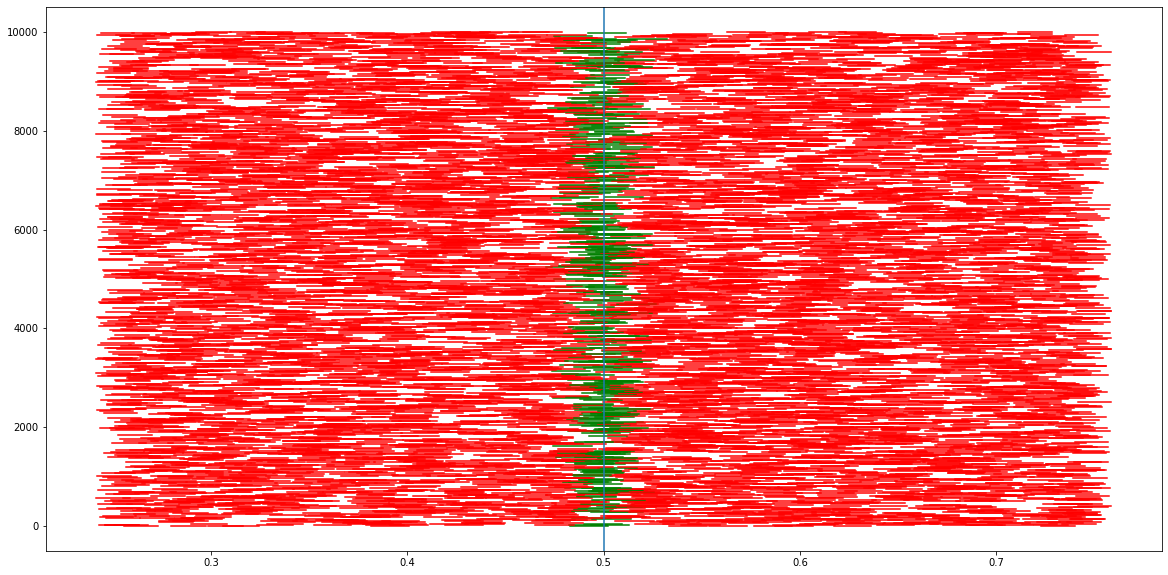

In [ ]:
plt.figure(figsize=(20,10)) 
for i in range(len(df)):
    if df["rechazo"][i]==1:
        plt.plot([df["stat1"][i],df["stat2"][i]] ,[df["i"][i],df["i"][i] ],c="g")
    else:
        plt.plot([df["stat1"][i],df["stat2"][i]] ,[df["i"][i],df["i"][i] ],c="r")
plt.axvline(0.5)



# 10,000 simulaciones con tamaño de muestra 10,000. Se escoge aleatoriamente valores de h0 y se deja el verdadero valor del parámetro fijo. Líneas verdes muestran intervalos de confianza en donde no se rechaza la hipótesis nula. Líneas rojas muestran intervalos de confianza en donde se rechaza la hipótesis nula. Se repite el experimento ordenando los intervalos de menor a mayor


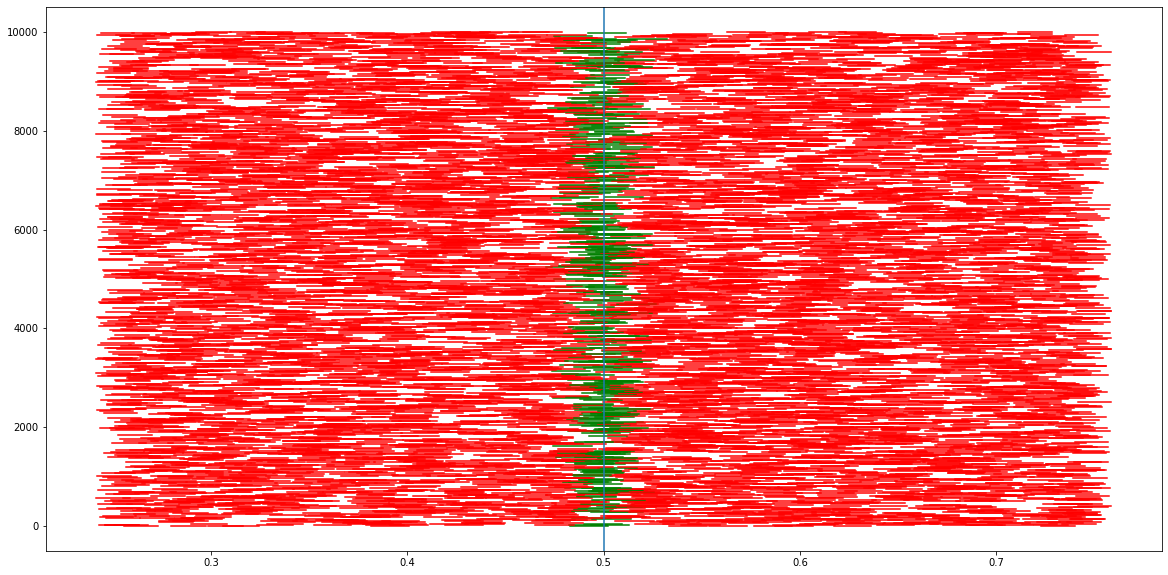

In [ ]:
plt.figure(figsize=(20,10)) 
for i in range(len(df)):
    if df["rechazo"][i]==1:
        plt.plot([df["stat1"][i],df["stat2"][i]] ,[df["i"][i],df["i"][i] ],c="g")
    else:
        plt.plot([df["stat1"][i],df["stat2"][i]] ,[df["i"][i],df["i"][i] ],c="r")
plt.axvline(0.5)
# Parametro fijo#

In [ ]:
response=[]
df=pd.DataFrame(columns=["theta","stat1","stat2","i","rechazo"])
dic={}


parameters=[1/4,1/2,1/3]
alpha=0.05
n=50
z1=norm.ppf(1-(alpha/2))
z2=norm.ppf((alpha/2))
m=1000

for i in range(0,n):
    theta=random.choice(parameters)
    record=[]
            
    mean=np.mean(np.random.binomial(1,theta,m))
    for x in parameters:
        stat1=x+z1*((x*(1-x))/m)**(1/2)
        stat2=x+z2*((x*(1-x))/m)**(1/2)
        if mean<stat1 and mean>stat2:
            dic["rechazo"]=1
        else:
            dic["rechazo"]=0
        dic["theta"]=x
        dic["stat1"]=stat1
        dic["stat2"]=stat2
        dic["i"]=i
        df=pd.concat([df,pd.DataFrame([dic])],ignore_index=True)
      

# 50 simulaciones con tamaño de muestra 10,000. Se escoge aleatoriamente el valor del parámetro de la lista theta=1/2,1/3,1/4 y se crea un intervalo de confianza para cada uno de los posibles valores.  Líneas verdes muestran intervalos de confianza en donde no se rechaza la hipótesis nula. Líneas rojas muestran intervalos de confianza en donde se rechaza la hipótesis nula. Se repite el experimento ordenando los intervalos de menor a mayor


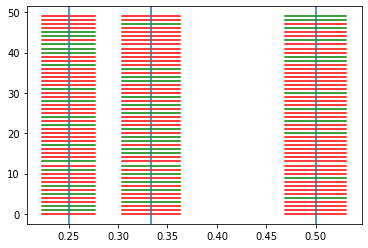

In [ ]:
for i in range(len(df)):
    if df["rechazo"][i]==1:
        plt.plot([df["stat1"][i],df["stat2"][i]] ,[df["i"][i],df["i"][i] ],c="g")
    else:
        plt.plot([df["stat1"][i],df["stat2"][i]] ,[df["i"][i],df["i"][i] ],c="r")

plt.axvline(parameters[0])
plt.axvline(parameters[1])
plt.axvline(parameters[2])     

#Parámetro variable 

In [ ]:
dic_df={}
response={}

parameters=[(i)/500 for i in range(1,100)]
df_return=pd.DataFrame(columns=["theta","prob","m"])
alpha=0.05
h0=0.1
z=norm.ppf(1-(alpha))
n=10000
n_m=[20,50,100,200,500]

for m in n_m:
    stat=h0+z*((h0*(1-h0))/m)**(1/2)
    df = pd.DataFrame(columns=parameters)
    for i in range(n):
        record={}
        for x in parameters:
            mean=np.mean(np.random.binomial(1,x,m))
            if mean>=stat:
                record[x]=1
                
            else:
                record[x]=0
        df=pd.concat([df,pd.DataFrame([record])],ignore_index=True)
    for c in df.columns:
        dic_return={}
        dic_return["prob"]=sum(df[c])/n
        dic_return["theta"]=c
        dic_return["m"]=m
        df_return=pd.concat([df_return,pd.DataFrame([dic_return])],ignore_index=True)

Potencia de la prueba h0=0.1 contra h1>0.1. Esta prueba se realizó con tamaños de muestra igual a 20,50,100,200,500




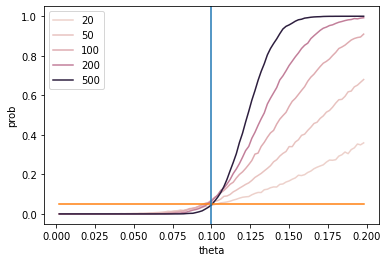

In [ ]:
seaborn.lineplot(data=df_return, x="theta", y='prob', hue='m')
seaborn.lineplot(x=parameters,y=[alpha for i in range(len(parameters))])
plt.axvline(h0)
plt.show()